## Load data

In [123]:
import os


data = []
for name in os.listdir('../res/20_newsgroups'):
    if '.csv' not in name:
        with open('../res/20_newsgroups/' + name, encoding='latin') as d:
            data.append({'data': d.read(), 'tag': name})





In [124]:
import re
import pandas as pd

pattern = 'Newsgroup: [^\n]+\n[D|d]ocument_id: [^\n]+\nFrom: [^\n]+\nSubject: [^\n]+\n\
|Newsgroup: [^\n]+\n[D|d]ocument_id: [^\n]+\nSubject: [^\n]+\nFrom: [^\n]+'

res = []
for d in data:
    news = (re.split(pattern, d['data']))
    for n in news:
        if n != '':
            res.append({'text':n, 'tag': d['tag']})
df = pd.DataFrame(res)
# df = df.sample(100)
df

,tag,text
0,sci.crypt.txt,"\nArchive-name: ripem/faq\nLast-update: Sun, 7..."
1,sci.crypt.txt,\nArchive-name: ripem/faq\nLast-update: 31 Mar...
2,sci.crypt.txt,\nArchive-name: ripem/attacks\nLast-update: 31...
3,sci.crypt.txt,"\n>>If you have access to FTP, try FTPing to r..."
4,sci.crypt.txt,\n Some sick part of me really liked that ph...
5,sci.crypt.txt,\nThere are many Urban Legends (maybe this oug...
6,sci.crypt.txt,\n\tFrom: res@colnet.cmhnet.org (Rob Stampfli)...
7,sci.crypt.txt,\n-----BEGIN PGP SIGNED MESSAGE-----\n\nIn art...
8,sci.crypt.txt,\nneuhaus@vier.informatik.uni-kl.de (Stephan N...
9,sci.crypt.txt,\n\n>This thread brings up the more general qu...


#### Normalize news

In [128]:
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer


def strip_newsgroup_header(text):
    _before, _blankline, after = text.partition('\n\n')
    return after


QUOTE_RE = re.compile(r'(writes in|writes:|wrote:|says:|said:'
                       r'|^In article|^Quoted from|^\||^>)')


def strip_newsgroup_quoting(text):
    good_lines = [line for line in text.split('\n')
                  if not QUOTE_RE.search(line)]
    return '\n'.join(good_lines)


def strip_newsgroup_footer(text):
    lines = text.strip().split('\n')
    for line_num in range(len(lines) - 1, -1, -1):
        line = lines[line_num]
        if line.strip().strip('-') == '':
            break

    if line_num > 0:
        return '\n'.join(lines[:line_num])
    else:
        return text

    
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words


def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(text):
    text = strip_newsgroup_footer(text)
    text = strip_newsgroup_header(text)
    text = strip_newsgroup_quoting(text)
    words = simple_preprocess(text)
#     words = word_tokenize(text)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
#     words = lemmatize_verbs(words)
    return words

In [129]:
df['normalize_text'] = df.text.apply(normalize)
df.to_json('norm_data.json')

In [130]:
import pandas as pd
df = pd.read_json('norm_data.json')


#### Построим гистограмы для кол-ва слов в каждом классе

In [131]:
from nltk import word_tokenize
import seaborn as sns


res = []
for tag in df.tag.unique():
    res.append({'tag': tag, 
                'count_words':[len(text) for text in df[df.tag.values == tag].normalize_text.values]})
    print(tag)

sci.crypt.txt
rec.sport.hockey.txt
comp.sys.ibm.pc.hardware.txt
talk.politics.guns.txt
rec.autos.txt
alt.atheism.txt
comp.os.ms-windows.misc.txt
comp.sys.mac.hardware.txt
sci.electronics.txt
comp.windows.x.txt
talk.religion.misc.txt
talk.politics.mideast.txt
sci.med.txt
rec.motorcycles.txt
comp.graphics.txt
sci.space.txt
talk.politics.misc.txt
misc.forsale.txt
soc.religion.christian.txt
rec.sport.baseball.txt


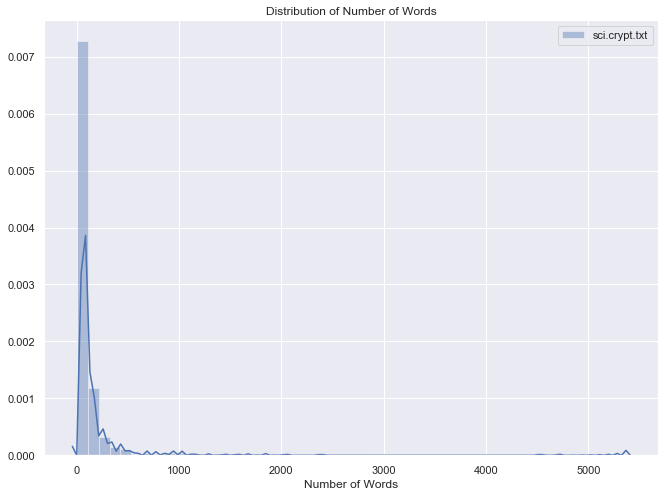

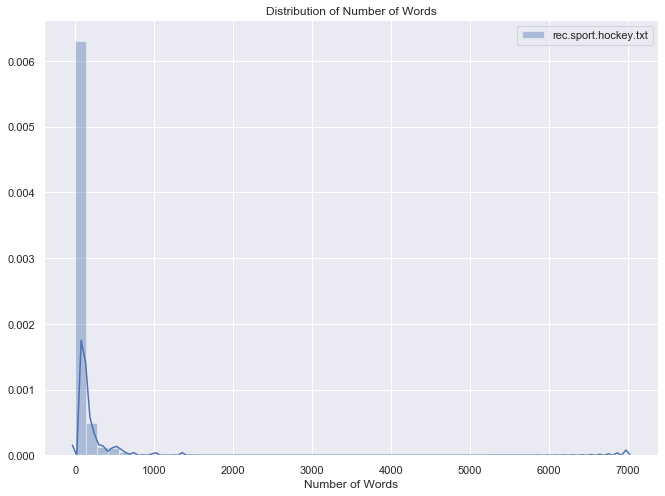

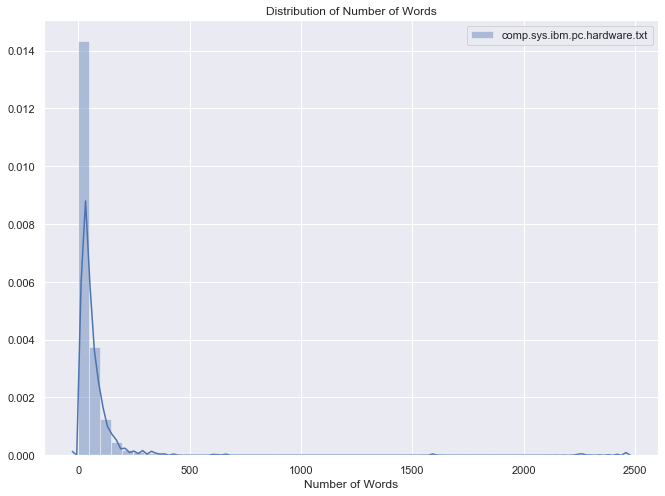

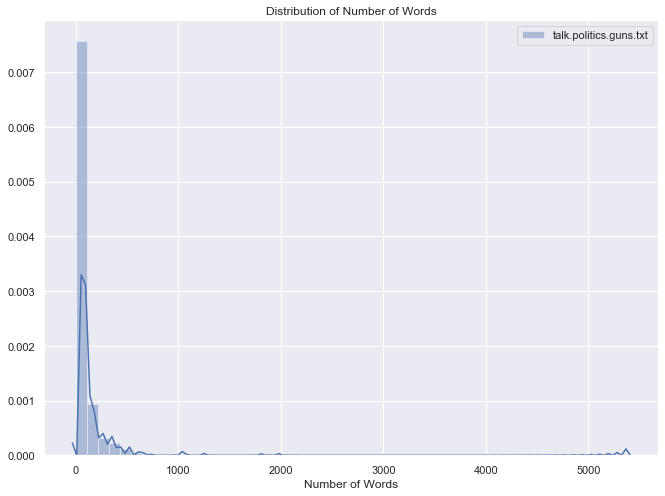

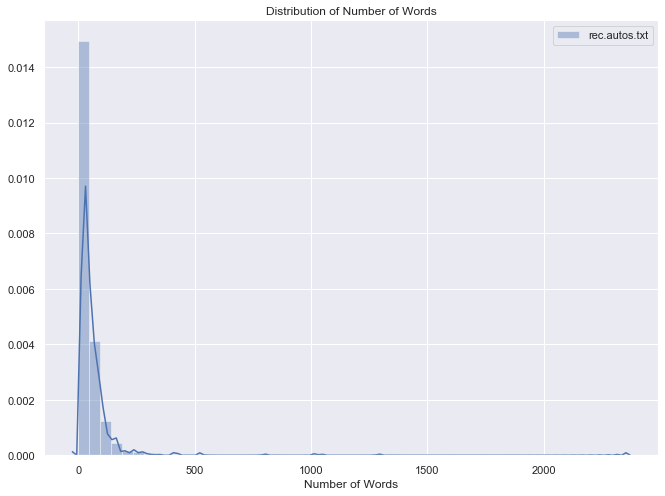

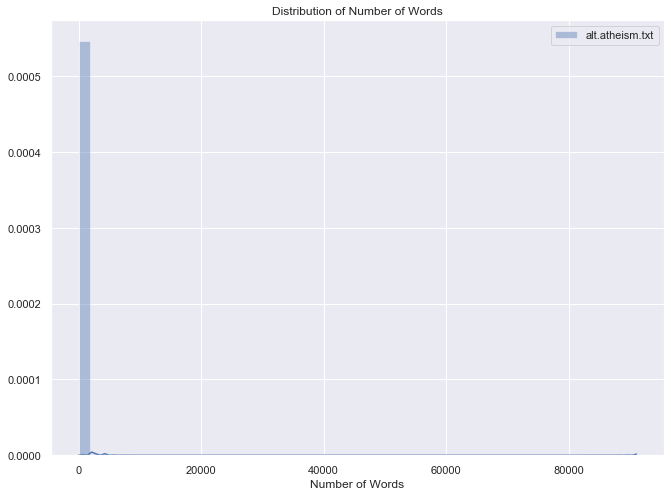

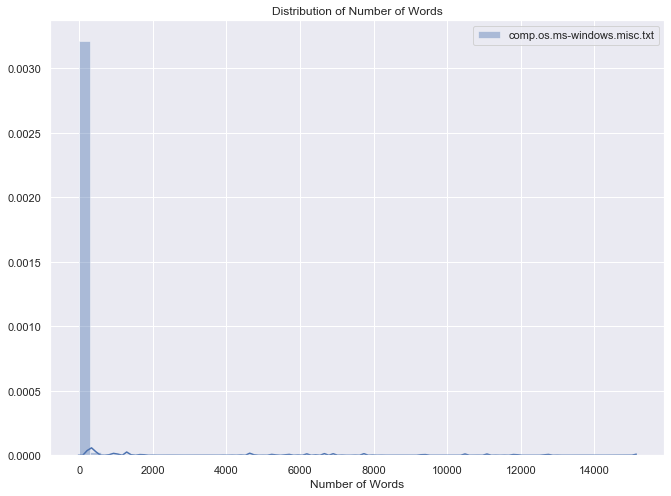

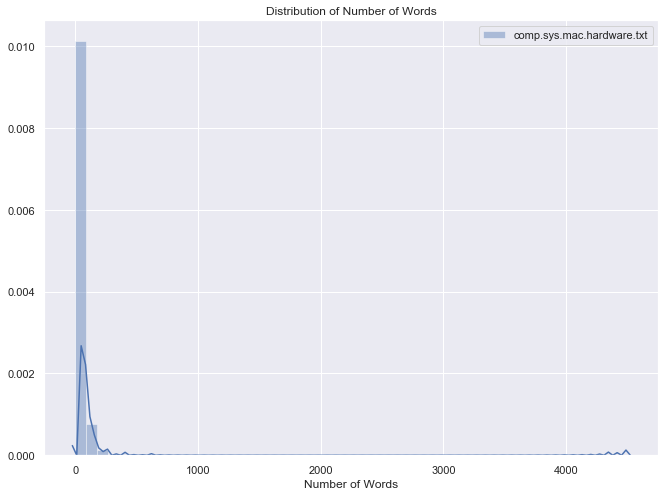

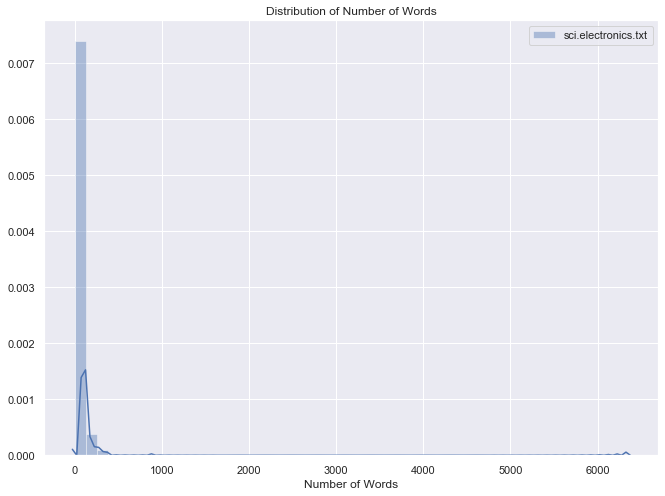

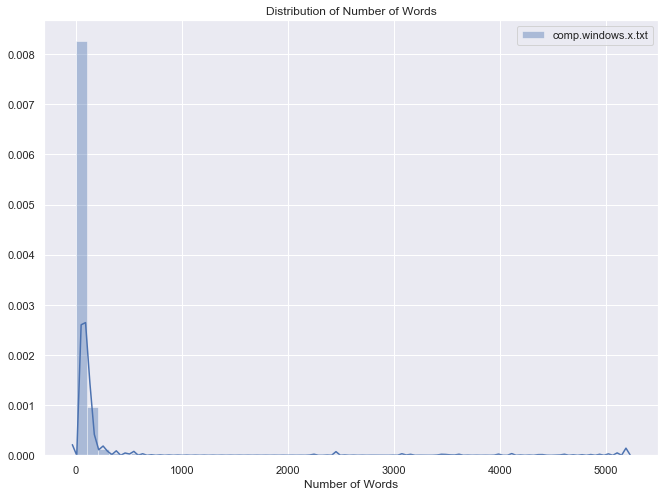

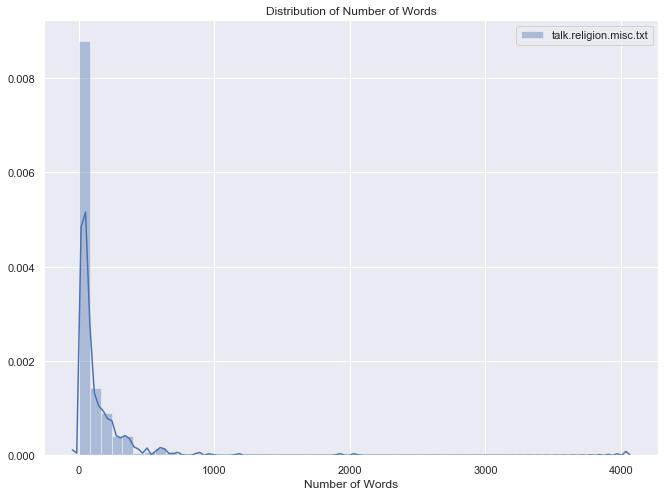

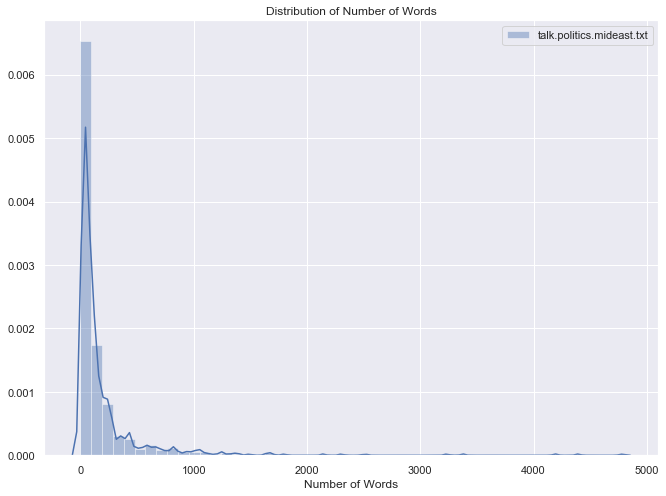

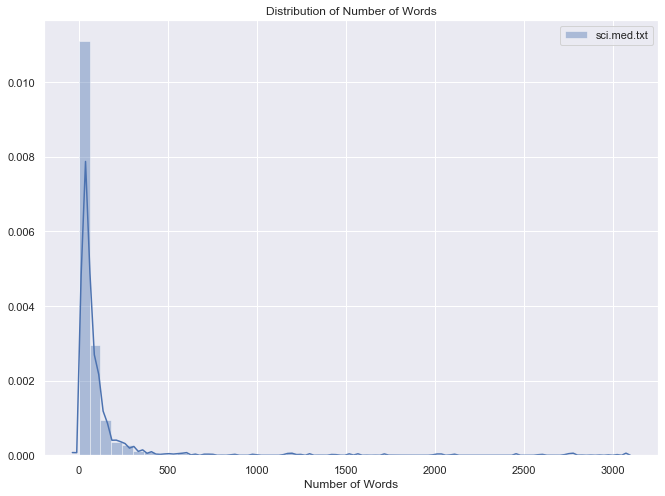

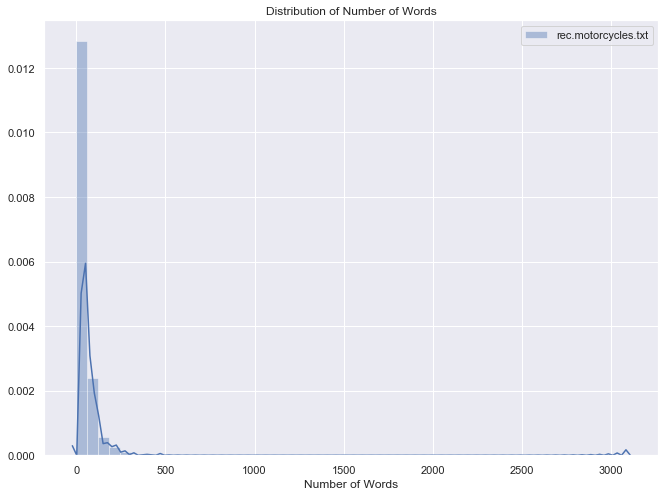

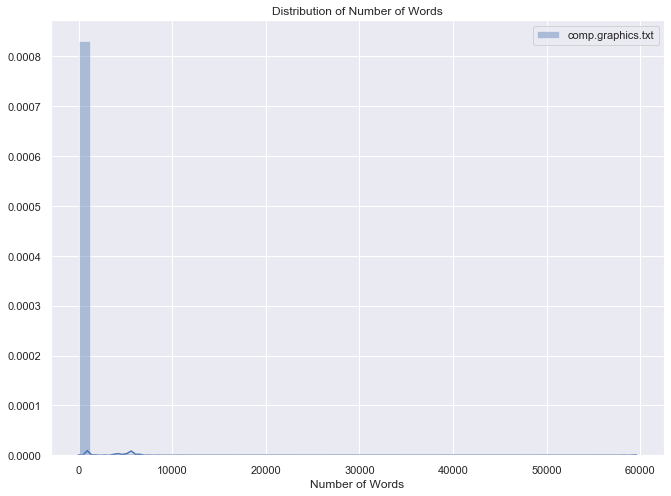

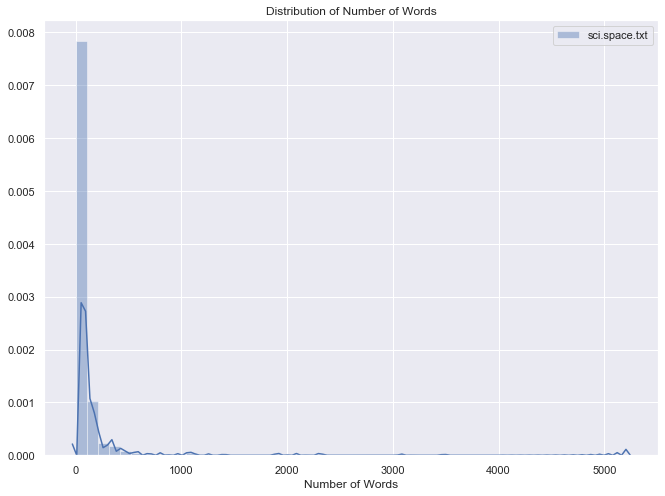

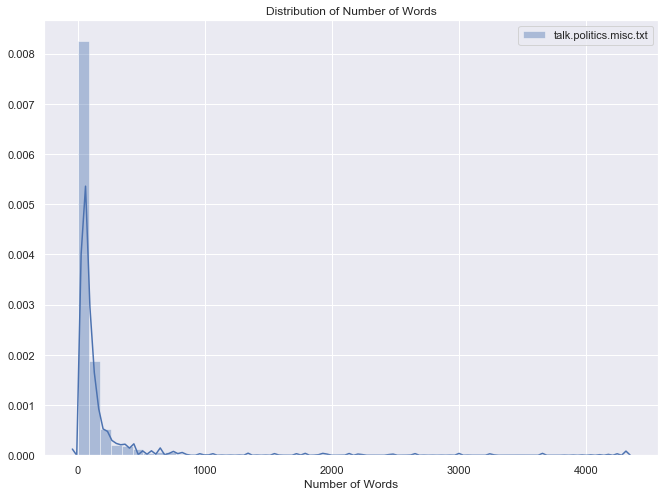

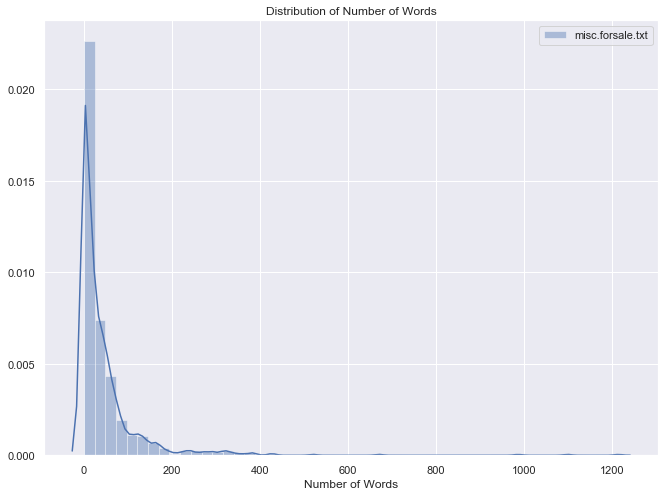

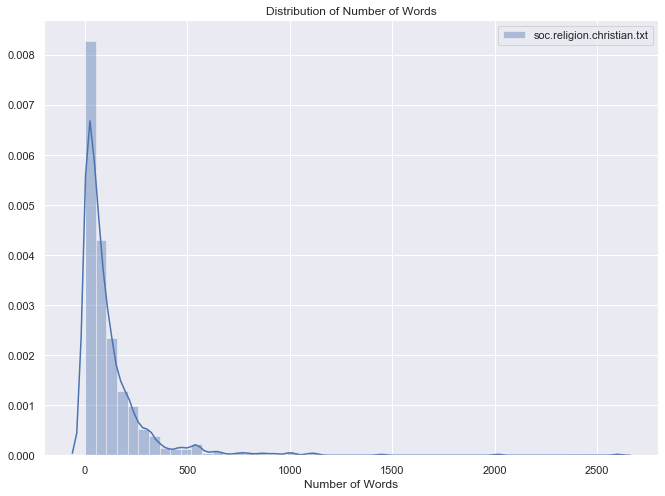

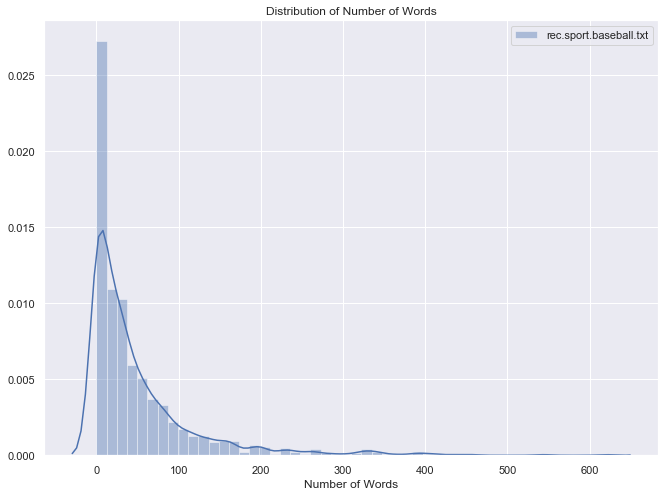

In [132]:
import matplotlib.pyplot as plt
for i in range(len(res)):
    sns.set(rc={'figure.figsize':(11,8)})
    sns.distplot(res[i]['count_words'], bins = 50, label = res[i]['tag'], )
    plt.legend()
    plt.title('Distribution of Number of Words')
    plt.xlabel('Number of Words')
    plt.show()

In [133]:
desc_df = pd.DataFrame()
for r in res:
    desc_df[r['tag']] = pd.Series(r['count_words']).describe()
desc_df = desc_df.T
desc_df.sort_values(by='75%')



,count,mean,std,min,25%,50%,75%,max
comp.sys.mac.hardware.txt,1922.0,43.254943,206.159287,0.0,1.0,19.0,47.00,4499.0
comp.os.ms-windows.misc.txt,1970.0,164.172589,1072.169538,0.0,2.0,22.0,49.00,15113.0
comp.graphics.txt,1947.0,133.853107,1451.267823,0.0,2.0,20.0,50.00,59582.0
misc.forsale.txt,1944.0,45.673868,90.069645,0.0,1.0,20.0,52.00,1214.0
rec.motorcycles.txt,1988.0,42.897384,108.764344,0.0,9.0,24.0,53.00,3087.0
rec.autos.txt,1980.0,45.684848,111.612743,0.0,4.0,24.0,54.00,2347.0
comp.sys.ibm.pc.hardware.txt,1964.0,50.976578,148.175580,0.0,4.0,24.0,56.00,2452.0
sci.electronics.txt,1962.0,49.165138,209.581150,0.0,4.0,27.0,59.00,6348.0
rec.sport.baseball.txt,1988.0,51.079477,72.786212,0.0,6.0,27.0,63.00,620.0
comp.windows.x.txt,1960.0,107.591837,481.749484,0.0,9.0,29.5,67.25,5202.0


In [147]:
def find_outliers(text):
    if len(text)  > 3000:
        return True
    else:
        return False
    
outliers_df = df
outliers_df = outliers_df[(outliers_df.normalize_text.apply(find_outliers))]



['try',
 'one',
 'size',
 'rather',
 'post',
 'name',
 'email',
 'tell',
 'enjoy',
 'begin',
 'big',
 'zip',
 'akdl',
 'yq',
 'tba',
 'hh',
 'bh',
 'cp',
 'wt',
 'jplp',
 'mid',
 'hn',
 'kh',
 'le',
 'aij',
 'xn',
 'bi',
 'hw',
 'oi_o',
 'oob',
 'psc',
 's_e_',
 'd_',
 'ggg',
 'kqqam',
 'm_',
 'nm',
 'xy',
 'r_d',
 'om',
 'yay',
 'x_',
 'nq',
 'mv',
 'ey',
 'vc_',
 'xqsv',
 'rwlt',
 'ylx',
 'wn',
 'd_',
 'wcg',
 'sswig',
 'k_ti',
 'm_',
 'xr',
 'st',
 'xsb',
 'mb',
 'qbyr',
 'qy',
 'xg',
 'n_jsg',
 'mfu',
 'gc',
 'mdy',
 'xkojs',
 'kegse',
 'gqd',
 'kilw',
 'mwipza_',
 'qjs',
 'an_',
 'im',
 'ov',
 'l_f',
 'kpwqvegc',
 'uo',
 'k_',
 'mqj',
 'jyxrijfllyjx',
 'vp',
 'xuulosmyv',
 'ynx',
 'xw',
 'qq',
 'qn',
 'jb',
 'xg',
 'fs',
 'ghldm',
 'dt',
 'mx',
 'nt',
 'rrri',
 'xz',
 'a_',
 'ms',
 'nx',
 'qb',
 's_',
 'uk',
 'po',
 'mu',
 'fl',
 'qwws',
 's_',
 'jv',
 'nxo',
 'r_',
 'ylw',
 'wc',
 'y_uw',
 'ps',
 'gw_',
 'i_',
 'yeulxw',
 'wogzf',
 'cx_v',
 'po',
 'hu',
 'wqi',
 'ows',
 'mm',
 'v

In [150]:
text = outliers_df.sample(1).text.values[0]
print(text)
print(normalize(text))


Archive-name: graphics/resources-list/part2
Last-modified: 1993/04/17


Computer Graphics Resource Listing : WEEKLY POSTING [ PART 2/3 ]
Last Change : 17 April 1993


14. Plotting packages

Gnuplot 3.2
-----------
  It is one of the best 2- and 3-D plotting packages, with
  online help.It's a command-line driven interactive function plotting utility
  for UNIX, MSDOS, Amiga, Archimedes, and VMS platforms (at least!).
  Freely distributed, it supports many terminals, plotters, and printers
  and is easily extensible to include new devices.
  It was posted to comp.sources.misc in version 3.0, plus 2 patches.
  You can practically find it everywhere (use Archie to find a site near you!).
  The comp.graphics.gnuplot newsgroup is devoted to discussion of Gnuplot.

Xvgr and Xmgr (ACE/gr)
-----------------------
  Xmgr is an XY-plotting tool for UNIX workstations using
  X or OpenWindows. There is an XView version called xvgr for
  Suns. Collectively, these 2 tools are known as ACE/gr.
  Com

['computer', 'graphics', 'resource', 'listing', 'weekly', 'posting', 'part', 'last', 'change', 'april', 'plotting', 'packages', 'gnuplot', 'one', 'best', 'plotting', 'packages', 'online', 'help', 'command', 'line', 'driven', 'interactive', 'function', 'plotting', 'utility', 'unix', 'msdos', 'amiga', 'archimedes', 'vms', 'platforms', 'least', 'freely', 'distributed', 'supports', 'many', 'terminals', 'plotters', 'printers', 'easily', 'extensible', 'include', 'new', 'devices', 'posted', 'comp', 'sources', 'misc', 'version', 'plus', 'patches', 'practically', 'find', 'everywhere', 'use', 'archie', 'find', 'site', 'near', 'comp', 'graphics', 'gnuplot', 'newsgroup', 'devoted', 'discussion', 'gnuplot', 'xvgr', 'xmgr', 'ace', 'gr', 'xmgr', 'xy', 'plotting', 'tool', 'unix', 'workstations', 'using', 'openwindows', 'xview', 'version', 'called', 'xvgr', 'suns', 'collectively', 'tools', 'known', 'ace', 'gr', 'compiling', 'xmgr', 'requires', 'motif', 'toolkit', 'version', 'xmgr', 'compile', 'motif', 

#### Оставим первые 500 токенов в каждом документе


In [135]:
df2 = df.sample(5000)
x = df2.normalize_text.apply(lambda x: ' '.join(x))
y = df2.tag.values


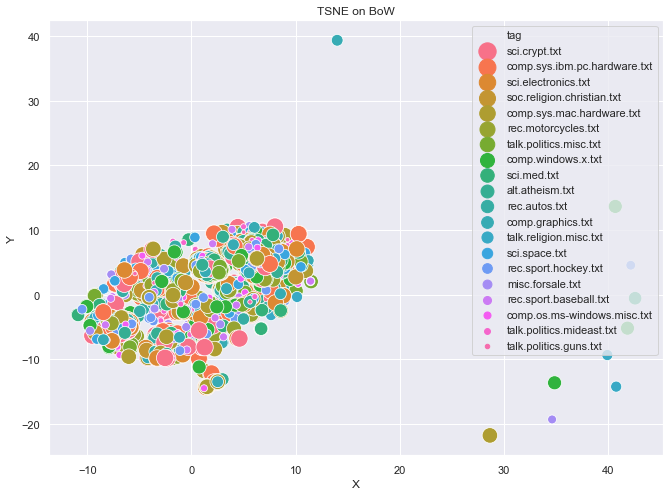

In [422]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


bow = CountVectorizer(max_features= 5000)
vectorizer = TfidfTransformer()

x_train = bow.fit_transform(x, y)
x_train = vectorizer.fit_transform(x_train)


tsne = TSNE(n_components = 2, perplexity= 50)
tsne_data = tsne.fit_transform(x_train.todense(), y = y)
tsne_data = pd.DataFrame(tsne_data, columns = ['X', 'Y'])
tsne_data['tag'] = y


sns.scatterplot(x = 'X', y = 'Y', hue = 'tag', data = tsne_data, size='tag',sizes=(20, 300))
plt.title('TSNE on BoW')
plt.show()

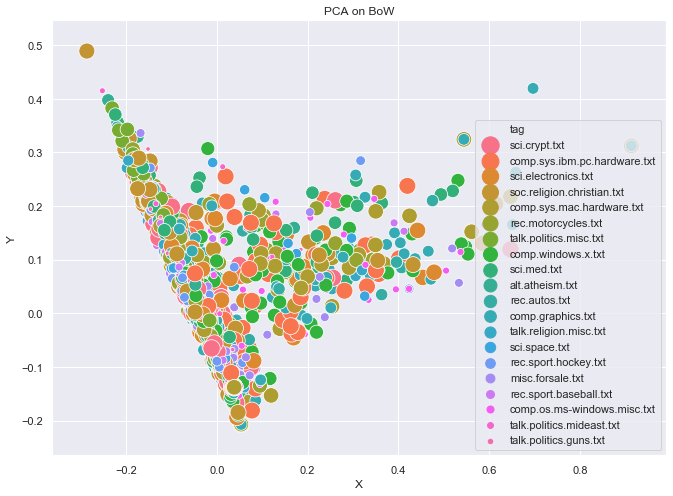

In [137]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train.todense())
pca_data = pd.DataFrame(pca_result, columns = ['X', 'Y'])
pca_data['tag'] = y


sns.scatterplot(x = 'X', y = 'Y', hue = 'tag', data = pca_data, size='tag',sizes=(20, 300))
plt.title('PCA on BoW')
plt.show()

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


n_samples = 1000
n_features = 500
n_components = 20
n_top_words = 10


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

data = x[:n_samples]

tf_vectorizer = CountVectorizer(max_df=0.9,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(data)


print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=1000 and n_features=500...
Topic #0: gm st john series cd general new want year wanted
Topic #1: usa russia paul nice group hope started night help future
Topic #2: known probably rule thanks help live agree talking great real
Topic #3: armenian armenians armenia turkish sy people bm turks anania soviet
Topic #4: israel jewish jews arab saw killed israeli claim ed anti
Topic #5: dos thanks edu software cd mail advance university email ii
Topic #6: book machine couple sure version times field stop called hard
Topic #7: windows nt players run world job applications based support future
Topic #8: drive card master slave information drives mb pin jumper computer
Topic #9: allocation linked vpic gfx cross unit bytes size disk files
Topic #10: ax max sl ei ql giz lk tm ey ah
Topic #11: unit allocation cross linked vpic gfx bytes disk size windows
Topic #12: god son father christ jesus book spirit bible man holy
Topic #13: la win mon bit mp serie

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.083s...
[t-SNE] Computed neighbors for 1000 samples in 1.088s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.040s
[t-SNE] Iteration 50: error = 114.7679901, gradient norm = 0.2946329 (50 iterations in 0.723s)
[t-SNE] Iteration 100: error = 113.9305573, gradient norm = 0.2833328 (50 iterations in 0.650s)
[t-SNE] Iteration 150: error = 118.9836884, gradient norm = 0.2482528 (50 iterations in 0.558s)
[t-SNE] Iteration 200: error = 116.1148682, gradient norm = 0.3085563 (50 iterations in 0.569s)
[t-SNE] Iteration 250: error = 115.5185242, gradient norm = 0.2900268 (50 iterations in 1.020s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 115.518524
[t-SNE] Iteration 300: error = 3.1085551, gradient norm = 0.0041623 (50 iterations in 0.405s)
[t-SNE] Iteration 350: error = 2.7428069, gradient norm = 0

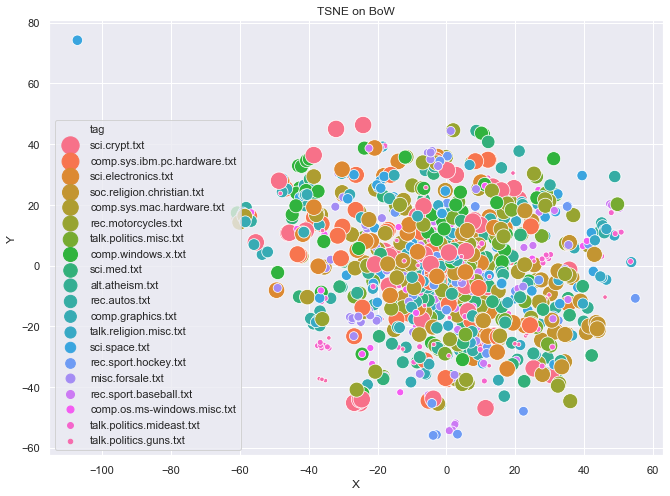

In [139]:
tsne = TSNE(n_components = 2, perplexity= 5, verbose=10)
tsne_data = tsne.fit_transform(tf.todense(), y = y)
tsne_data = pd.DataFrame(tsne_data, columns = ['X', 'Y'], )
tsne_data['tag'] = y[:n_samples]


sns.scatterplot(x = 'X', y = 'Y', hue = 'tag', data = tsne_data, size='tag',sizes=(20, 300))
plt.title('TSNE on BoW')
plt.show()

In [409]:
from gensim.models import word2vec
from gensim.utils import simple_preprocess


tokenized_corpus = df.normalize_text.values


feature_size = 10 
window_context = 10
min_word_count = 50



w2v_model = word2vec.Word2Vec(tokenized_corpus, min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [421]:
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=10)]
                  for search_term in ['sport', 'police', 'phone', 'religion', 'drive']}
pd.DataFrame(similar_words)

,sport,police,phone,religion,drive
0,autos,officers,telephone,religious,floppy
1,motorcycles,cops,voice,religions,drives
2,moto,atf,fax,islam,hard
3,baseball,adl,company,christianity,esdi
4,rec,fbi,cellular,atheists,seagate
5,thread,officials,call,views,ide
6,espn,officer,snail,culture,quantum
7,lately,agents,cordless,christian,controller
8,seen,branch,calls,orthodox,maxtor
9,crap,bullock,sends,judaism,boot


In [413]:
from sklearn.cluster import KMeans

vectors = w2v_model.wv.vectors
num_clusters = 6

def clustering_on_wordvecs(word_vectors, num_clusters):
    kmeans_clustering = KMeans(n_clusters = num_clusters, n_init=10)
    idx = kmeans_clustering.fit(word_vectors)
    return kmeans_clustering.cluster_centers_, idx

centers, clusters = clustering_on_wordvecs(vectors, num_clusters)

Top terms per cluster:
Cluster 0: 'might', 'window', 'email', 'keep', 'second', 'three', 'simply', 'real', 'general', 'available',
Cluster 1: 'keep', 'real', 'might', 'available', 'current', 'general', 'rather', 'email', 'window', 'person',
Cluster 2: 'keep', 'might', 'simply', 'real', 'us', 'look', 'work', 'available', 'human', 'general',
Cluster 3: 'number', 'think', 'today', 'person', 'take', 'things', 'nothing', 'available', 'seem', 'either',
Cluster 4: 'work', 'current', 'st', 'us', 'rather', 'thought', 'trying', 'images', 'person', 'find',
Cluster 5: 'trying', 'current', 'window', 'new', 'game', 'several', 'sun', 'simply', 'email', 'real',


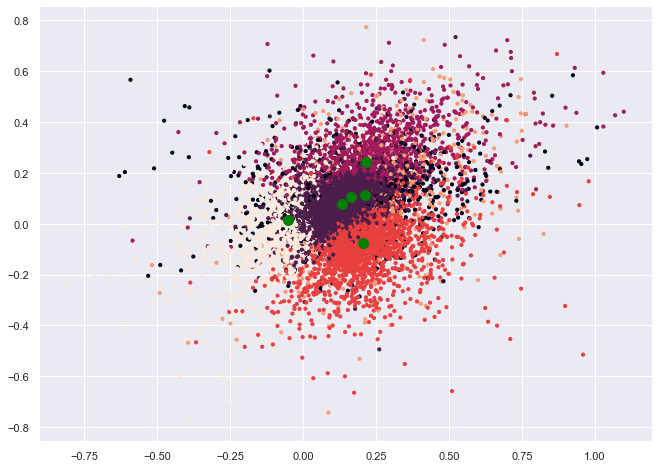

In [419]:
print("Top terms per cluster:")
order_centroids = clusters.cluster_centers_.argsort()[:, ::-1]
terms = w2v_model.wv.index2word

for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' \'%s\'' % terms[ind], end=',')
    print()
    
y_kmeans = clusters.predict(vectors)
plt.scatter(vectors[:, 0], vectors[:, 1], c=y_kmeans, s=10)
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=100);